# Fake and real news dataset

Fake news spread through social media has become a serious problem. Can we use this data set to make an algorithm able to determine if an article is fake news or not ?

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

This dataset comprises approximately 40,000 articles including both fake and authentic news (around 20,000 each). Our goal is to find and train a model to accurately predict whether a given piece of news is genuine or fabricated.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import datetime

## Import Dataset

In [1]:
true = pd.read_csv('/data/notebook_files/True.csv')
fake = pd.read_csv('/data/notebook_files/Fake.csv')

print(f'Rows and columns of True news: {true.shape} \nRows and columns of False news: {fake.shape}')

NameError: NameError: name 'pd' is not defined

In [3]:
true.head()

title 
 text 
 subject 
 date 
 
 
 
 
 0 
 As U.S. budget fight looms, Republicans flip t... 
 WASHINGTON (Reuters) - The head of a conservat... 
 politicsNews 
 December 31, 2017 
 
 
 1 
 U.S. military to accept transgender recruits o... 
 WASHINGTON (Reuters) - Transgender people will... 
 politicsNews 
 December 29, 2017 
 
 
 2 
 Senior U.S. Republican senator: 'Let Mr. Muell... 
 WASHINGTON (Reuters) - The special counsel inv... 
 politicsNews 
 December 31, 2017 
 
 
 3 
 FBI Russia probe helped by Australian diplomat... 
 WASHINGTON (Reuters) - Trump campaign adviser ... 
 politicsNews 
 December 30, 2017 
 
 
 4 
 Trump wants Postal Service to charge 'much mor... 
 SEATTLE/WASHINGTON (Reuters) - President Donal... 
 politicsNews 
 December 29, 2017

In [4]:
fake.head()

title 
 text 
 subject 
 date 
 
 
 
 
 0 
 Donald Trump Sends Out Embarrassing New Year’... 
 Donald Trump just couldn t wish all Americans ... 
 News 
 December 31, 2017 
 
 
 1 
 Drunk Bragging Trump Staffer Started Russian ... 
 House Intelligence Committee Chairman Devin Nu... 
 News 
 December 31, 2017 
 
 
 2 
 Sheriff David Clarke Becomes An Internet Joke... 
 On Friday, it was revealed that former Milwauk... 
 News 
 December 30, 2017 
 
 
 3 
 Trump Is So Obsessed He Even Has Obama’s Name... 
 On Christmas day, Donald Trump announced that ... 
 News 
 December 29, 2017 
 
 
 4 
 Pope Francis Just Called Out Donald Trump Dur... 
 Pope Francis used his annual Christmas Day mes... 
 News 
 December 25, 2017

In [4]:
import textwrap
print(textwrap.fill('True news:   '+true.text[0], 120))

True news:   WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this
month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday
and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark
Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do
battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal
budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional
election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his
Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-
defense “discretionary” spending on programs that s

In [5]:
print(textwrap.fill('Fake news:   '+ fake.text[0], 120))
# there are many @ in the fake news 

Fake news:   Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to
give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just
one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my
friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,
President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and
smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a
Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31,
2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this
despicable, petty, infantile gibberish? Only Trump! His lack of decen

## Visualization of the Raw Data

### 1. Add a column for True or Fake and a column for text length, then Union two sets together  

In [4]:
true['label'] = 1
fake['label'] = 0

In [5]:
true['text_length'] = true['text'].apply(len)
fake['text_length'] = fake['text'].apply(len)

In [6]:
news = pd.concat([true, fake])
news.shape

(44898, 6)

In [9]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        44898 non-null  object
 1   text         44898 non-null  object
 2   subject      44898 non-null  object
 3   date         44898 non-null  object
 4   label        44898 non-null  int64 
 5   text_length  44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


### 2. Check N/A

In [10]:
news.isna().sum() 

title 0
text 0
subject 0
date 0
label 0
text_length 0
dtype: int64

#### 2.1 the date value of some rows are not dates

In [7]:
# some values in the date column was url or an article -- delete these rows
indices_to_drop = news[news['date'].str.len()>30].index #the indices of rows to drop
news = news.drop(indices_to_drop)
news.shape

(44880, 6)

### 3. Summary Statistics

[Text(0.5, 1.0, 'Count of the news by True - 1/Fake - 0)')]

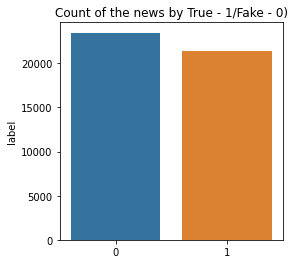

In [12]:
plt.figure(figsize = [4, 4], clear = True, facecolor = 'white')
sns.barplot(x = news['label'].value_counts().index,
            y = news['label'].value_counts(),
            saturation = 0.7).set(title = 'Count of the news by True - 1/Fake - 0)')

The data is balanced between true and fake news

#### 3.1 Count of news by date &  Oldest and Latest date

In [14]:
news.groupby('label').date.nunique()

label
0 1675
1 716
Name: date, dtype: int64

In [9]:
news['date'] = pd.to_datetime(news['date'])

news.groupby('label').date.max(), \
news.groupby('label').date.min() 

(label
 0   2018-02-19
 1   2017-12-31
 Name: date, dtype: datetime64[ns],
 label
 0   2015-03-31
 1   2016-01-13
 Name: date, dtype: datetime64[ns])

#### 3.2 Count of news by subject

In [13]:
news.groupby('label').subject.value_counts()

label subject 
0 News 9050
 politics 6836
 left-news 4456
 Government News 1568
 US_News 783
 Middle-east 778
1 politicsNews 11271
 worldnews 10138
Name: subject, dtype: int64

[Text(0.5, 1.0, 'Count of the news by Subject')]

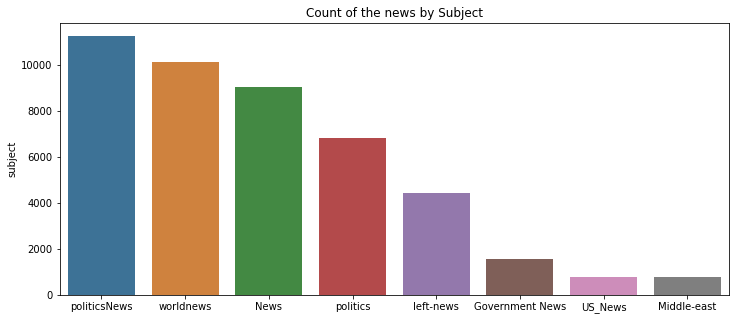

In [17]:
plt.figure(figsize = [12, 5], clear = True, facecolor = 'white')
sns.barplot(x = news['subject'].value_counts().index,
            y = news['subject'].value_counts(),
            saturation = 0.6).set(title = 'Count of the news by Subject')

In [18]:
fig = px.pie(news, names = 'subject', title = 'Count of the news by Subject', hole = 0.2,
            width = 800, height = 400, color_discrete_sequence = px.colors.sequential.YlGnBu)
fig.update_layout(title_x = 0.5, title_font = dict(size = 15), uniformtext_minsize = 25)
fig.show()

#### 3.3 Count of tokens by subject -- Take out the @ sign in the fake news could make the articles shorter
Token: a single unit of text, which could be a word, a punctuation mark, or any other meaningful element derived from the text.

In [19]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=list(fake['text_length']), name='Fake'))
fig.add_trace(go.Box(y=list(true['text_length']), name = 'Real'))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Box plot',
})
fig.show()

#### 3.4 Count of @ by subject -- Take out the @ in the model analysis

In [20]:
# create a new column for the count of "@"
news['count_At'] = news['text'].apply(lambda x: x.count('@'))
news['count_At'].describe()

count 44880.000000
mean 0.645811
std 3.070899
min 0.000000
25% 0.000000
50% 0.000000
75% 0.000000
max 88.000000
Name: count_At, dtype: float64

In [21]:
# the count of "@" by Real/Fake news
news[news.count_At > 0].groupby('label').count_At.count()

label
0 6312
1 282
Name: count_At, dtype: int64

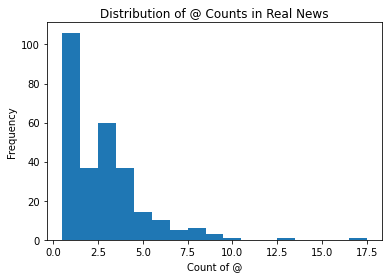

In [22]:
plt.hist(news[news.label==1]['count_At'], bins=range(1, news[news.label==1]['count_At'].max()), align='left')
plt.xlabel('Count of @')
plt.ylabel('Frequency')
plt.title('Distribution of @ Counts in Real News')
plt.show()

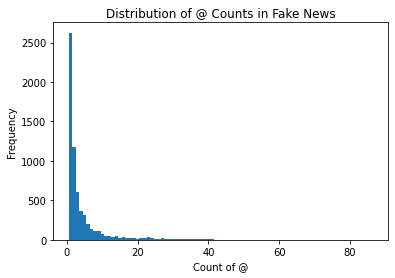

In [23]:
# Create a histogram to show the distribution of '@' counts
plt.hist(news[news.label==0]['count_At'], bins=range(1, news[news.label==0]['count_At'].max()), align='left')
plt.xlabel('Count of @')
plt.ylabel('Frequency')
plt.title('Distribution of @ Counts in Fake News')
plt.show()

#### 3.5 Wordcloud

In [14]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', width = 800, height = 400,
               contour_width = 0, contour_color = 'red', max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

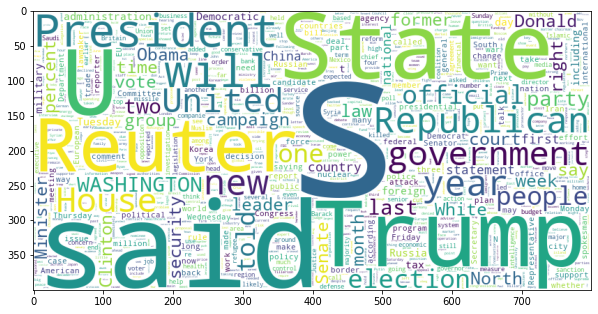

In [15]:
# Real news wordcloud

text = " ".join(i for i in true.text)
wc.generate(text)

plt.figure(figsize = [10, 7])
plt.imshow(wc)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

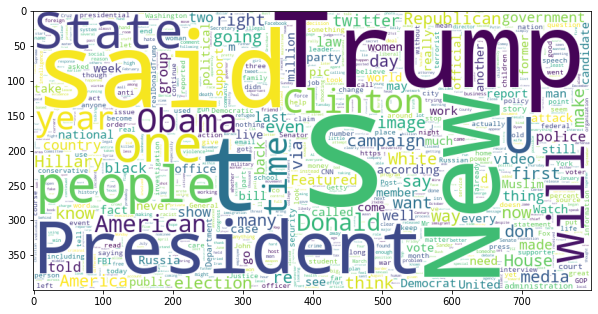

In [26]:
# Fake news wordcloud

text = " ".join(i for i in fake.text)
wc.generate(text)

plt.figure(figsize = [10, 7])
plt.imshow(wc)
plt.show

## Data Preprocessing

### 1. Convert all text to lower case

In [8]:
news['title'] = news['title'].str.lower()
news['text'] = news['text'].str.lower()
news['subject'] = news['subject'].str.lower()
news.head(2)

title 
 text 
 subject 
 date 
 label 
 text_length 
 
 
 
 
 0 
 as u.s. budget fight looms, republicans flip t... 
 washington (reuters) - the head of a conservat... 
 politicsnews 
 December 31, 2017 
 1 
 4659 
 
 
 1 
 u.s. military to accept transgender recruits o... 
 washington (reuters) - transgender people will... 
 politicsnews 
 December 29, 2017 
 1 
 4077

### 2. String cleaning 
- Remove URLs, numbers and punctuation
- Normalize unicode characters like U+0041 for the letter "A", and U+1F60A for the emoji "😊"

In [9]:
# urls
news['text'] = news['text'].str.replace('https?:\/\/.*[\r\n]*', '', regex=False)

# numbers 
news['text'] = news['text'].str.replace('\d+', '', regex=False)

# punctuation
news['text'] = news['text'].str.replace('[^\w\s]', '', regex=False)

#unicode
news['text'] = news['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

### 3. Remove stop words 

- Stop words include words like "and," "the," "is," "in," "at," "on," etc., which are essential for the structure of sentences but might not contribute much to the understanding or interpretation of the content when analyzing the text.

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize   # performs tokenization, which is the process of breaking down a text into individual words.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
# use the stopwords class from nltk package
stop_words = set(stopwords.words('english'))

# define a function to remove the stop words 
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [12]:
# Apply the function on the column "text"
news['text'] = news['text'].apply(remove_stopwords)

## Modeling - Clustering on news subject

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

### All news subject clustering 

The Adjusted Rand Index (ARI) is a measure of the similarity between two data clusterings. 
- It accounts for chance agreement between clusterings by comparing the proportion of agreements to the expected agreement under independence. 
- The Adjusted Rand Index ranges from -1 to 1. A score of 1 indicates perfect agreement between the two clusterings, a score of 0 indicates random agreement, and negative scores indicate disagreement worse than random.

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
- A score close to +1 indicates that the sample is far away from neighboring clusters, meaning it is well-clustered.
- A score close to 0 indicates that the sample is close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the sample may have been assigned to the wrong cluster.

In [14]:
X_text = news['text'].values
subjects = news['subject'].values

# Preprocess and vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text_tfidf = vectorizer.fit_transform(X_text)

In [15]:
num_clusters = [3,4,5,6,7,8,9]

for num in num_clusters:
    # Apply K-means clustering
    # n_init is the number of times the K-means algorithm will be run with different initial centroids. The final result is the best clustering result (lowest inertia or within-cluster sum of squares) among all the runs. A larger n_init value increases the likelihood of finding a better overall clustering solution.
    kmeans = KMeans(n_clusters = num, random_state = 42, n_init = 20)

    clusters = kmeans.fit_predict(X_text_tfidf)

    # Add cluster labels to the DataFrame
    news['cluster'] = clusters

    # compare subject value and cluster
    ari_score = adjusted_rand_score(news['subject'], news['cluster'])
    
    print(f'Number of clusters is {num}.\n Adjusted Rand Index: {ari_score}')

Number of clusters is 3.
 Adjusted Rand Index: 0.12310610575904715
Number of clusters is 4.
 Adjusted Rand Index: 0.16851868465935868
Number of clusters is 5.
 Adjusted Rand Index: 0.3035267717544357
Number of clusters is 6.
 Adjusted Rand Index: 0.2774509951523409
Number of clusters is 7.
 Adjusted Rand Index: 0.25908480323244526
Number of clusters is 8.
 Adjusted Rand Index: 0.1670235295787764
Number of clusters is 9.
 Adjusted Rand Index: 0.16650430695415658


### Real news clustering

In [22]:
real_news = news.loc[news['label']==1, :].copy()
X_text_real = real_news['title'].values

# Preprocess and vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text_real_tfidf = vectorizer.fit_transform(X_text_real)

num_clusters = [2, 3, 4, 5, 6]

for num in num_clusters:
    # Apply K-means clustering
    # n_init is the number of times the K-means algorithm will be run with different initial centroids. The final result is the best clustering result (lowest inertia or within-cluster sum of squares) among all the runs. A larger n_init value increases the likelihood of finding a better overall clustering solution.
    kmeans = KMeans(n_clusters = num, random_state = 42, n_init = 20)

    clusters = kmeans.fit_predict(X_text_real_tfidf)

    # Add cluster labels to the DataFrame
    real_news.loc[:, 'cluster'] = clusters

    # Compute Silhouette Score
    silhouette_avg = silhouette_score(X_text_real_tfidf, clusters)

    # compare subject value and cluster
    ari_score = adjusted_rand_score(real_news['subject'], real_news['cluster'])
    
    print(f'For real news: \n Number of clusters is {num}.\n Adjusted Rand Index: {ari_score}.\n Silhouette Score: {silhouette_avg}')

For real news: 
 Number of clusters is 2.
 Adjusted Rand Index: 0.0020723607903413645.
 Silhouette Score: 0.002985109915065958
For real news: 
 Number of clusters is 3.
 Adjusted Rand Index: 0.1856726020116472.
 Silhouette Score: 0.004569115586171237
For real news: 
 Number of clusters is 4.
 Adjusted Rand Index: 0.00480412629756644.
 Silhouette Score: 0.005562552942849847
For real news: 
 Number of clusters is 5.
 Adjusted Rand Index: 0.13737735246167268.
 Silhouette Score: 0.0063973323161542455
For real news: 
 Number of clusters is 6.
 Adjusted Rand Index: 0.10124441010841921.
 Silhouette Score: 0.007109058676690683


In [21]:
real_news = news.loc[news['label']==1, :].copy()
X_text_real = real_news['text'].values

# Preprocess and vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text_real_tfidf = vectorizer.fit_transform(X_text_real)

num_clusters = [2, 3, 4, 5, 6]

for num in num_clusters:
    # Apply K-means clustering
    # n_init is the number of times the K-means algorithm will be run with different initial centroids. The final result is the best clustering result (lowest inertia or within-cluster sum of squares) among all the runs. A larger n_init value increases the likelihood of finding a better overall clustering solution.
    kmeans = KMeans(n_clusters = num, random_state = 42, n_init = 20)

    clusters = kmeans.fit_predict(X_text_real_tfidf)

    # Add cluster labels to the DataFrame
    real_news.loc[:, 'cluster'] = clusters

    # Compute Silhouette Score
    silhouette_avg = silhouette_score(X_text_real_tfidf, clusters)

    # compare subject value and cluster
    ari_score = adjusted_rand_score(real_news['subject'], real_news['cluster'])
    
    print(f'For real news: \n Number of clusters is {num}.\n Adjusted Rand Index: {ari_score}.\n Silhouette Score: {silhouette_avg}')

For real news: 
 Number of clusters is 2.
 Adjusted Rand Index: 0.5454891794815008.
 Silhouette Score: 0.009229953389023297
For real news: 
 Number of clusters is 3.
 Adjusted Rand Index: 0.4887325143811511.
 Silhouette Score: 0.010228992307697126
For real news: 
 Number of clusters is 4.
 Adjusted Rand Index: 0.33667354624749635.
 Silhouette Score: 0.009367140968337122
For real news: 
 Number of clusters is 5.
 Adjusted Rand Index: 0.18036722805473915.
 Silhouette Score: 0.011188151246627507
For real news: 
 Number of clusters is 6.
 Adjusted Rand Index: 0.12233242454373057.
 Silhouette Score: 0.012912011299340467


### Fake news clustering

In [31]:
fake_news = news.loc[news['label']==0, :].copy()
X_text_fake = fake_news['title'].values

# Preprocess and vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text_fake_tfidf = vectorizer.fit_transform(X_text_fake)

num_clusters = [2, 3, 4, 5, 6]

for num in num_clusters:
    # Apply K-means clustering
    # n_init is the number of times the K-means algorithm will be run with different initial centroids. The final result is the best clustering result (lowest inertia or within-cluster sum of squares) among all the runs. A larger n_init value increases the likelihood of finding a better overall clustering solution.
    kmeans = KMeans(n_clusters = num, random_state = 42, n_init = 20)

    clusters = kmeans.fit_predict(X_text_fake_tfidf)

    # Add cluster labels to the DataFrame
    fake_news.loc[:, 'cluster'] = clusters

    # Compute Silhouette Score
    silhouette_avg = silhouette_score(X_text_fake_tfidf, clusters)

    # compare subject value and cluster
    ari_score = adjusted_rand_score(fake_news['subject'], fake_news['cluster'])
    
    print(f'For fake news: \n Number of clusters is {num}.\n Adjusted Rand Index: {ari_score}.\n Silhouette Score: {silhouette_avg}')

For fake news: 
 Number of clusters is 2.
 Adjusted Rand Index: 0.017480672752730242.
 Silhouette Score: 0.00318330505675802
For fake news: 
 Number of clusters is 3.
 Adjusted Rand Index: 0.024796452813375763.
 Silhouette Score: 0.004064423268990471
For fake news: 
 Number of clusters is 4.
 Adjusted Rand Index: 0.0329620146156739.
 Silhouette Score: 0.004929302590999396
For fake news: 
 Number of clusters is 5.
 Adjusted Rand Index: 0.012682781422643646.
 Silhouette Score: 0.004953870349060101
For fake news: 
 Number of clusters is 6.
 Adjusted Rand Index: 0.04483839198960293.
 Silhouette Score: 0.005974852859062355


In [33]:
fake_news = news.loc[news['label']==0, :].copy()
X_text_fake = fake_news['text'].values

# Preprocess and vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text_fake_tfidf = vectorizer.fit_transform(X_text_fake)

num_clusters = [2, 3, 4, 5, 6]

for num in num_clusters:
    # Apply K-means clustering
    # n_init is the number of times the K-means algorithm will be run with different initial centroids. The final result is the best clustering result (lowest inertia or within-cluster sum of squares) among all the runs. A larger n_init value increases the likelihood of finding a better overall clustering solution.
    kmeans = KMeans(n_clusters = num, random_state = 42, n_init = 20)

    clusters = kmeans.fit_predict(X_text_fake_tfidf)

    # Add cluster labels to the DataFrame
    fake_news.loc[:, 'cluster'] = clusters

    # Compute Silhouette Score
    silhouette_avg = silhouette_score(X_text_fake_tfidf, clusters)

    # compare subject value and cluster
    ari_score = adjusted_rand_score(fake_news['subject'], fake_news['cluster'])
    
    print(f'For fake news: \n Number of clusters is {num}.\n Adjusted Rand Index: {ari_score}.\n Silhouette Score: {silhouette_avg}')

For fake news: 
 Number of clusters is 2.
 Adjusted Rand Index: 0.03441717692899721.
 Silhouette Score: 0.011161386214602081
For fake news: 
 Number of clusters is 3.
 Adjusted Rand Index: 0.0447284729089845.
 Silhouette Score: 0.014244951876723276
For fake news: 
 Number of clusters is 4.
 Adjusted Rand Index: 0.040538673964997454.
 Silhouette Score: 0.013006374155900877
For fake news: 
 Number of clusters is 5.
 Adjusted Rand Index: 0.03766254157108431.
 Silhouette Score: 0.016276865401750096
For fake news: 
 Number of clusters is 6.
 Adjusted Rand Index: 0.07397973373238396.
 Silhouette Score: 0.015317779972418925


There could be several reasons why the clustering performance appears poor:

Sparse Text Data: Text data tends to be high-dimensional and sparse, especially when represented using techniques like TF-IDF. In high-dimensional spaces, traditional distance-based clustering algorithms like K-means may struggle to find meaningful clusters, leading to suboptimal results.

Lack of Inherent Structure: Real news articles may not exhibit clear and distinct clusters based solely on their text content. Unlike datasets with well-defined clusters, such as customer segmentation data or image data, the natural structure of news articles might be more complex and less amenable to clustering.

Noise and Variability: News articles cover a wide range of topics and writing styles, leading to a high degree of variability within the dataset. This variability can introduce noise and make it challenging for clustering algorithms to identify meaningful patterns.

Curse of Dimensionality: In high-dimensional spaces, the distance between points becomes less meaningful, making it harder for clustering algorithms to discern clusters accurately. This issue is exacerbated when using text data with a large number of features (e.g., TF-IDF vectors with many unique terms).

Given these challenges, it's essential to consider alternative approaches or preprocessing steps to improve clustering performance:

Dimensionality Reduction: Use techniques like principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) to reduce the dimensionality of the TF-IDF vectors before clustering.

Alternative Clustering Algorithms: Experiment with other clustering algorithms that are more robust to high-dimensional and sparse data, such as spectral clustering or hierarchical clustering.

Feature Engineering: Explore different text representations or feature engineering techniques to capture more meaningful patterns in the text data, such as word embeddings or topic modeling.

Domain Knowledge: Incorporate domain knowledge or additional metadata (e.g., publication date, author information) to enrich the clustering process and guide the interpretation of the results.

## Modeling - Real or Fake Classification 

### 1. "Shallow": Multinomial Naive Bayes classifier

Multinomial Naive Bayes is a probabilistic classification algorithm that is widely used for text classification tasks, such as spam filtering, sentiment analysis, and topic categorization. It is a variant of the Naive Bayes algorithm, which is based on Bayes' theorem of probability

In Multinomial Naive Bayes, the underlying probability distribution used for modeling the data is the multinomial distribution. This distribution is suitable for discrete data, where each feature represents the count or frequency of a term in a document.

Multinomial Naive Bayes is particularly well-suited for text classification tasks where the input features are the word frequencies or term frequencies in a document. Each document is represented as a vector of word counts, and the classifier predicts the category or class of the document.

#### 1.1 Prep: Split data into training and testing sets and Vectorize text data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(news['text'],  news['label'], test_size=0.2, random_state=42)

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### 1.2 Train the model

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test_tfidf)

#### 1.3 Evaluate the model

In [31]:
print('Accuracy:', accuracy_score(y_test, predictions), '\n')
print('\nClassification Report:\n', classification_report(y_test, predictions), '\n')

Accuracy: 0.9506461675579323 


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4657
           1       0.95      0.95      0.95      4319

    accuracy                           0.95      8976
   macro avg       0.95      0.95      0.95      8976
weighted avg       0.95      0.95      0.95      8976
 




Confusion Matrix:
 [[4426  231]
 [ 212 4107]]


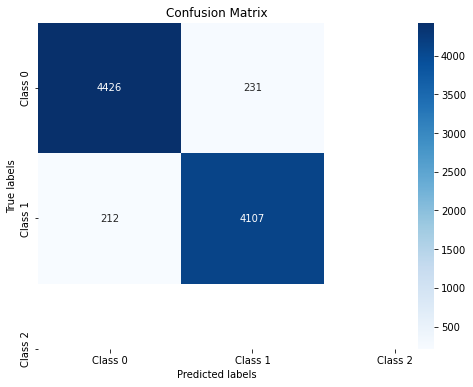

In [32]:
cm = confusion_matrix(y_test, predictions)
print('\nConfusion Matrix:\n', cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

- Cross validation

a resampling procedure used to assess the performance of a machine learning model. The dataset is divided into several subsets, and the model is trained and evaluated multiple times on different combinations of training and validation sets.

In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.94875366 0.94972845 0.94708258 0.95209581 0.9505571 ]
Mean Cross-Validation Accuracy: 0.949643519206324


the results indicate that the Multinomial Naive Bayes model is performing consistently well across different folds, with accuracy scores ranging from approximately 94.57% to 95.21%. 

### 2. "Deep": LSTM (Long Short-term Memory)

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem associated with traditional RNNs. LSTMs are particularly effective for modeling sequences and have found widespread use in natural language processing (NLP) tasks, including text classification.

In text classification, LSTMs can be used to model sequential dependencies in sentences. The network processes the input text word by word, capturing contextual information and learning to make predictions based on the entire sequence.

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV

In [35]:
X = news['text'].values
y = news['label'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000  
max_len = 200 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

embedding_dim = 50 

NameError: NameError: name 'train_test_split' is not defined

#### Model 1

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)) 

# Adjust based on LSTM units
# the term "units" refers to the number of memory cells or processing units within the LSTM layer. 
# Each LSTM unit contains a set of components, including memory cells and gating mechanisms, allowing the network to capture and control the flow of information over sequential data.
model.add(LSTM(units=100))  

# Binary classification - units=1 is common for this.
# sigmoid maps any real-valued number to the range between 0 and 1. 
model.add(Dense(units=1, activation='sigmoid'))  

# Compile the model
# Adam (short for Adaptive Moment Estimation) is an optimization algorithm that combines the benefits of two other popular optimization algorithms: RMSprop and Momentum. 
# It's designed to provide adaptive learning rates for each parameter, adjusting the learning rates during training based on the historical gradients of each parameter.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

In [38]:
# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
898/898 [==============================] - 177s 195ms/step - loss: 0.1179 - accuracy: 0.9571 - val_loss: 0.0877 - val_accuracy: 0.9715
Epoch 2/5
898/898 [==============================] - 171s 190ms/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 3/5
898/898 [==============================] - 167s 186ms/step - loss: 0.0264 - accuracy: 0.9930 - val_loss: 0.0382 - val_accuracy: 0.9894
Epoch 4/5
898/898 [==============================] - 169s 188ms/step - loss: 0.0212 - accuracy: 0.9945 - val_loss: 0.0765 - val_accuracy: 0.9734
Epoch 5/5
898/898 [==============================] - 167s 186ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0515 - val_accuracy: 0.9848


In [39]:
# Evaluate on the test set
accuracy = model.evaluate(X_test_pad, y_test)[1]
print("Test Set Accuracy:", accuracy)

281/281 [==============================] - 10s 35ms/step - loss: 0.0571 - accuracy: 0.9843
Test Set Accuracy: 0.9842914342880249


Model 1
The model is compiled using the Adam optimizer and binary cross-entropy loss, with accuracy as the evaluation metric. During training for 5 epochs with a batch size of 32, the model achieves increasingly higher accuracy on both the training and validation sets. 
The training history shows decreasing loss and increasing accuracy over epochs, indicating successful learning and generalization. The final accuracy on the validation set is 98.48%, suggesting good performance in classifying news articles as real or fake.

#### Model 2

In [43]:
embedding_vector_features=150
model2 = Sequential()
model2.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(200))) 
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 50)           250000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 400)               401600    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 401       
                                                                 
Total params: 652001 (2.49 MB)
Trainable params: 652001 (2.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [44]:
model2.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
898/898 [==============================] - 1080s 1s/step - loss: 0.1250 - accuracy: 0.9585 - val_loss: 0.0465 - val_accuracy: 0.9883
Epoch 2/5
898/898 [==============================] - 1061s 1s/step - loss: 0.0565 - accuracy: 0.9813 - val_loss: 0.0361 - val_accuracy: 0.9903
Epoch 3/5
898/898 [==============================] - 1055s 1s/step - loss: 0.0630 - accuracy: 0.9803 - val_loss: 0.0516 - val_accuracy: 0.9845
Epoch 4/5
898/898 [==============================] - 1056s 1s/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0346 - val_accuracy: 0.9903
Epoch 5/5
898/898 [==============================] - 1062s 1s/step - loss: 0.0270 - accuracy: 0.9907 - val_loss: 0.1315 - val_accuracy: 0.9469


In [45]:
# Evaluate on the test set
accuracy = model2.evaluate(X_test_pad, y_test)[1]
print("Test Set Accuracy:", accuracy)

281/281 [==============================] - 68s 241ms/step - loss: 0.1387 - accuracy: 0.9415
Test Set Accuracy: 0.9415106773376465


## Next steps

### Preprocessing

- Remove Stop words
    - Stop words include words like "and," "the," "is," "in," "at," "on," etc., which are essential for the structure of sentences but might not contribute much to the understanding or interpretation of the content when analyzing the text.
- Vectorizing the data
    -   from sklearn.feature_extraction.text import TfidfVectorizer (Convert text data to numerical features)

### Clustering 
-   to compare with the subject column
-   K-means, DBSCAN

### Classification
-   Logistic Regression
-   LSTM (Long Short-Term Memory) - a type of recurrent neural network (RNN) architecture. (Tensorflow)

### Other techniques - still exploring

### Test on both the title and content of tweets respectively. Compare their performance.
  
### Performance evaluation
-   Remove the @ in all contents. the length of fake news would be shorter and that could change the model.
-   Confussion Matrix  
-   Kappa Statistics
-   Accuracy (TP+TN)/(TP+TN+FN+FP)
-   Precision TP/(TP+FP)
-   Recall/Sensitivity TP/(TP+FN)
- ...


### Other steps
If we see different result between the analysis of title and content, we are going to dig deeper into that. For example, we need to check if the dataset is biased and how the biases have impact on the models. Then we can adjust our make improvements and get our conclusions  